In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\data science\Projects\911\911.csv")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.shape

(99492, 9)

### top5 zipcodes for 911

In [5]:
df.value_counts(['zip']).head()

zip    
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
dtype: int64

In [60]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'hour', 'month', 'dayofweek', 'Date', 'date'],
      dtype='object')

### top 5 townships for 911 calls

In [6]:
df.value_counts(['twp']).head()

twp         
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
dtype: int64

### unique title codes

In [7]:
df['title'].nunique()

110

### creating a new column reason

In [8]:
df['Reason'] = df['title'].apply(lambda x:x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


### most common Reason for a 911 call based off of this new column

In [9]:
df.value_counts(['Reason'])

Reason 
EMS        48877
Traffic    35695
Fire       14920
dtype: int64

### countplot of 911 calls by Reason

<Axes: xlabel='Reason', ylabel='count'>

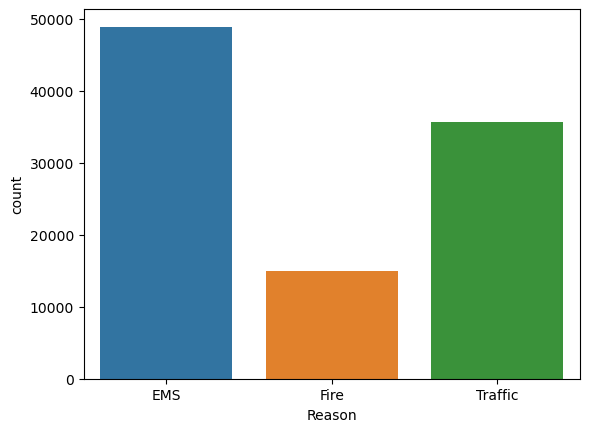

In [10]:
sns.countplot(data=df, x='Reason')

### data type of the objects in the timeStamp column

### converting the column from strings to DateTime objects

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   Reason     99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


### creating hour, month, day columns

In [12]:
df['hour']=df['timeStamp'].apply(lambda time:time.hour)
df['month']=df['timeStamp'].apply(lambda time:time.month)
df['dayofweek']=df['timeStamp'].apply(lambda time:time.dayofweek)
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3


In [13]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofweek']=df['dayofweek'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


### Day of Week column with the hue based off of the Reason column.

<Axes: xlabel='dayofweek', ylabel='count'>

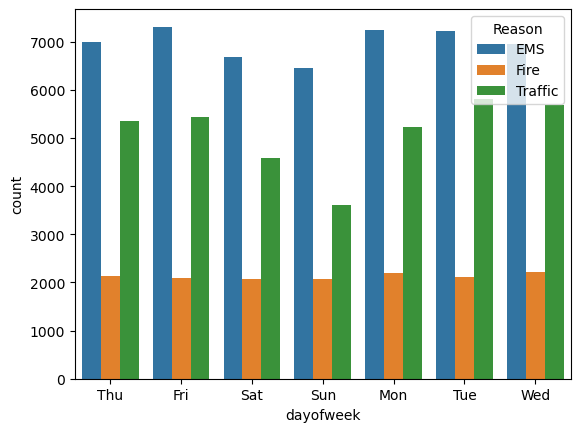

In [14]:
sns.countplot(data=df, x='dayofweek', hue='Reason')

### same for Month

<Axes: xlabel='month', ylabel='count'>

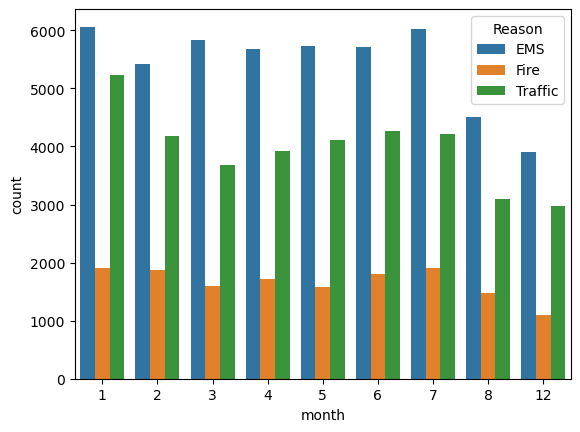

In [15]:
sns.countplot(data=df, x='month', hue='Reason')

In [16]:
byMonth = df.groupby('month').count()

In [17]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [18]:
bymonth = df.groupby('month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,dayofweek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<Axes: xlabel='month', ylabel='lat'>

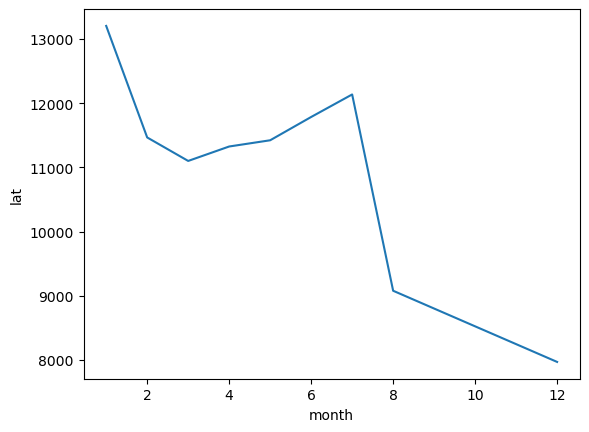

In [20]:
sns.lineplot(data=bymonth, x='month', y='lat')

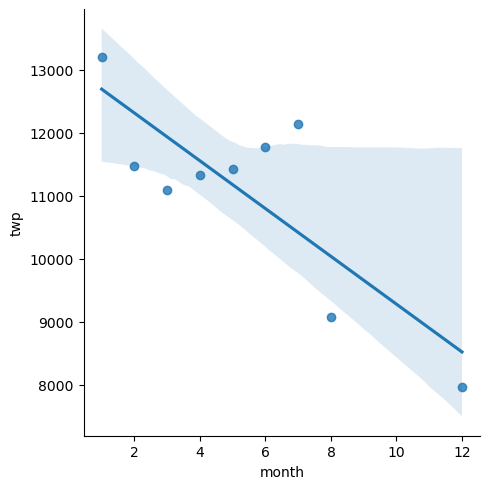

In [28]:
bymonth.reset_index(inplace=True)
sns.lmplot(data=bymonth, x='month', y='twp')

In [32]:
df['date']=df['timeStamp'].dt.date
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek,Date,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,2015-12-10


<Axes: xlabel='date', ylabel='lat'>

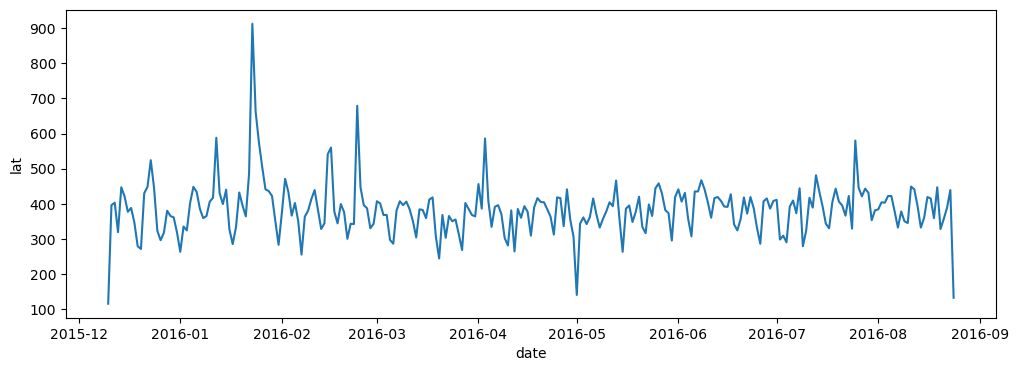

In [36]:
plt.figure(figsize=(12,4))
bydate = df.groupby('date').count()
sns.lineplot(data=bydate, x='date', y='lat')

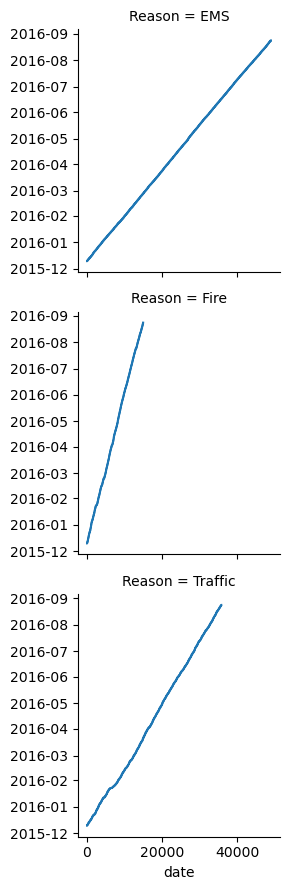

In [44]:
fg=sns.FacetGrid(data=df,row='Reason')
fg=fg.map(plt.plot,'date')

In [48]:
df1 = df.pivot_table(index='dayofweek', columns='hour', values='twp', aggfunc='count')
df1

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


<Axes: xlabel='hour', ylabel='dayofweek'>

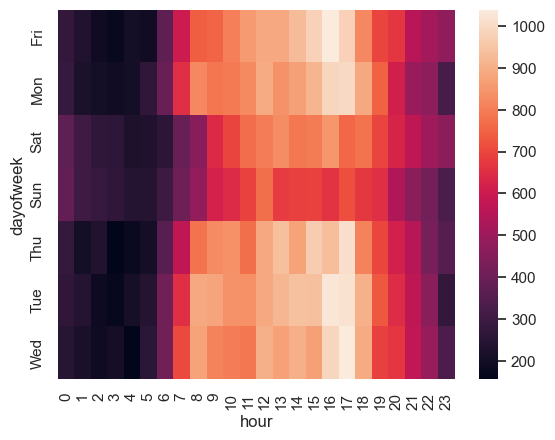

In [55]:

sns.heatmap(data=df1)

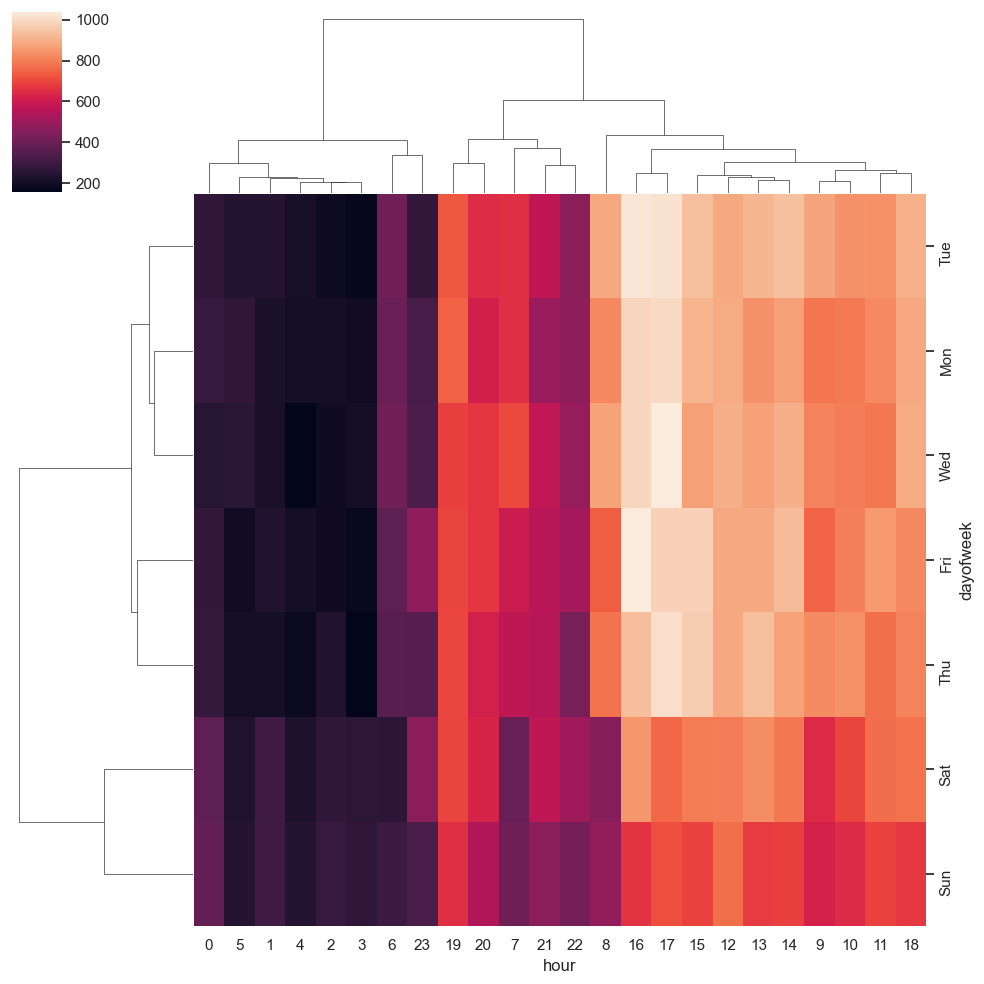

In [56]:
sns.clustermap(df1)

In [57]:
df2 = df.pivot_table(index='dayofweek', columns='month', values='twp', aggfunc='count')
df2

month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


<Axes: xlabel='month', ylabel='dayofweek'>

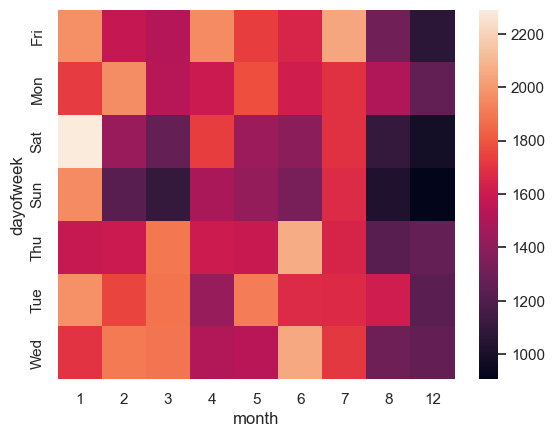

In [58]:
sns.heatmap(data=df2)

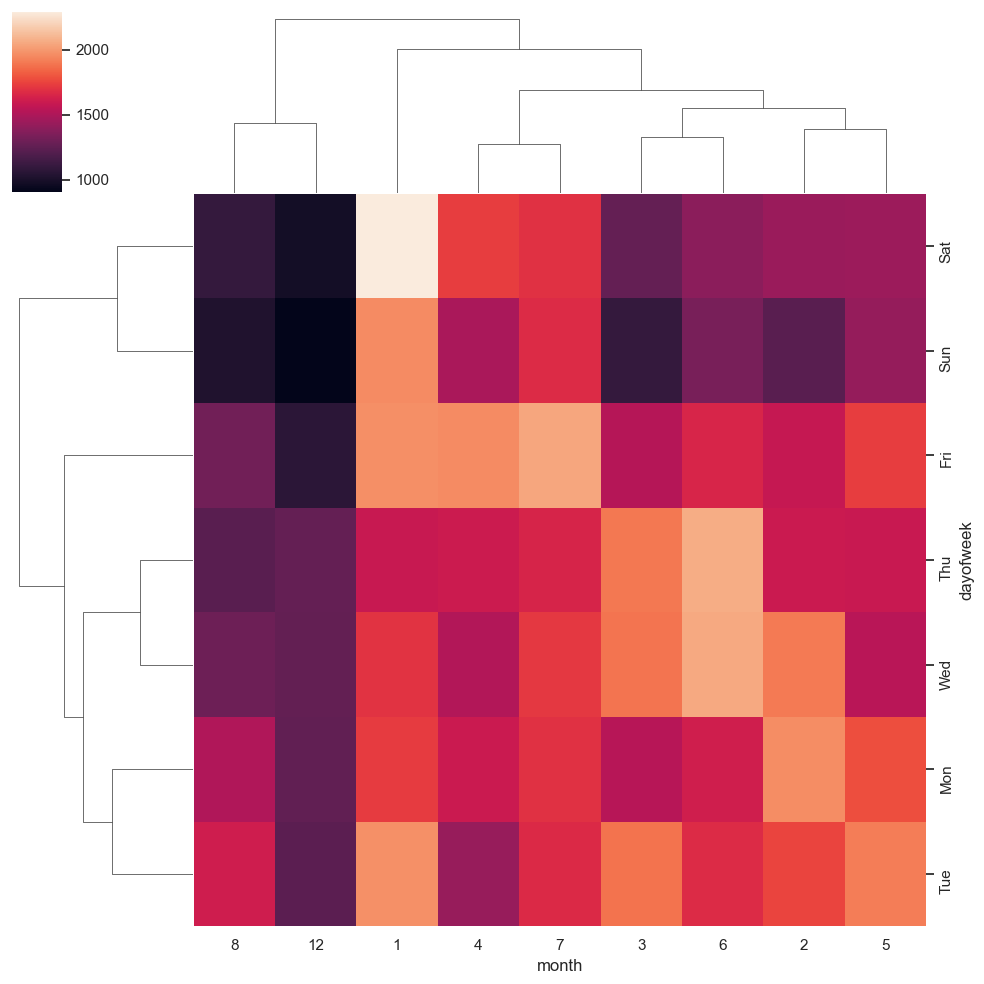

In [59]:
sns.clustermap(df2)

## get creative

<Axes: xlabel='hour', ylabel='count'>

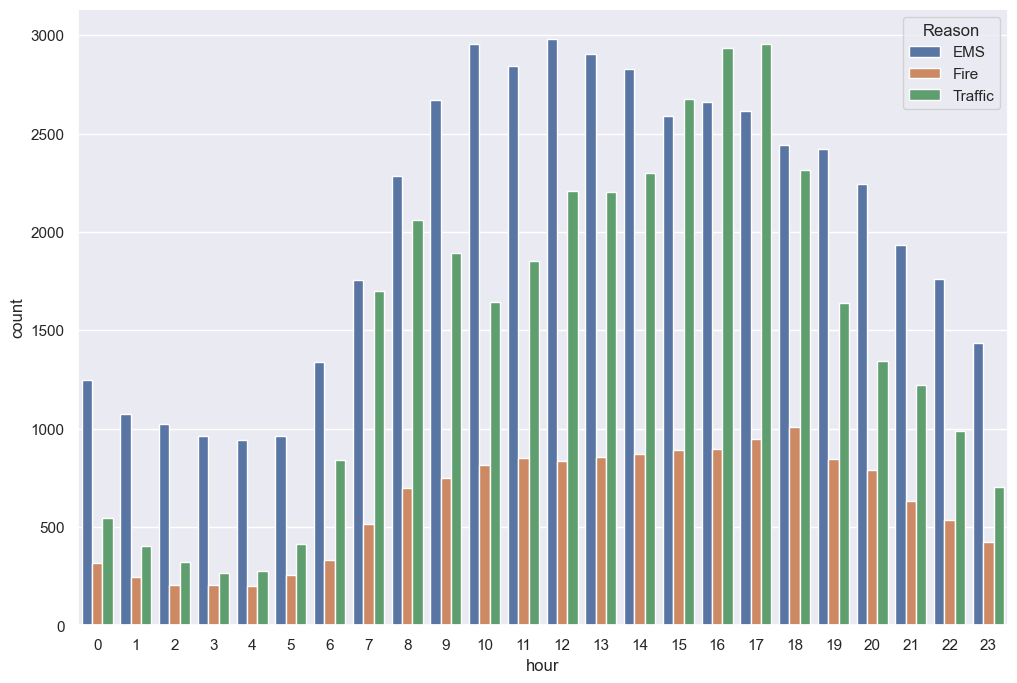

In [61]:
plt.figure(figsize=(12, 8))
sns.countplot(data = df, x = 'hour', hue = 'Reason')

In [62]:
byHour = df.groupby('hour')
byHour = byHour.count()
byHour

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,month,dayofweek,Date,date
hour,,,,,,,,,,,,,,
0,2112,2112,2112,1869,2112,2112,2109,2105,2112,2112,2112,2112,2112,2112
1,1721,1721,1721,1530,1721,1721,1718,1714,1721,1721,1721,1721,1721,1721
2,1549,1549,1549,1350,1549,1549,1548,1543,1549,1549,1549,1549,1549,1549
3,1435,1435,1435,1264,1435,1435,1433,1431,1435,1435,1435,1435,1435,1435
4,1418,1418,1418,1254,1418,1418,1418,1415,1418,1418,1418,1418,1418,1418
5,1629,1629,1629,1401,1629,1629,1628,1628,1629,1629,1629,1629,1629,1629
6,2513,2513,2513,2112,2513,2513,2511,2504,2513,2513,2513,2513,2513,2513
7,3970,3970,3970,3418,3970,3970,3969,3947,3970,3970,3970,3970,3970,3970
8,5044,5044,5044,4385,5044,5044,5044,5023,5044,5044,5044,5044,5044,5044


<Axes: xlabel='hour', ylabel='count'>

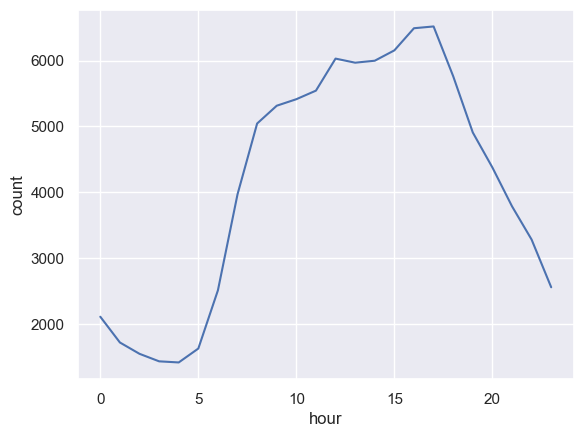

In [63]:
plt.ylabel('count')
sns.lineplot(data = byHour, x = 'hour', y = 'title')